<a href="https://colab.research.google.com/github/RaedHadad/Elephant/blob/main/tasks/Tut_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install findspark
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=6233434c244eef30650f743fbd8a075ff42013459a89c602e371f0df15b08d68
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|po

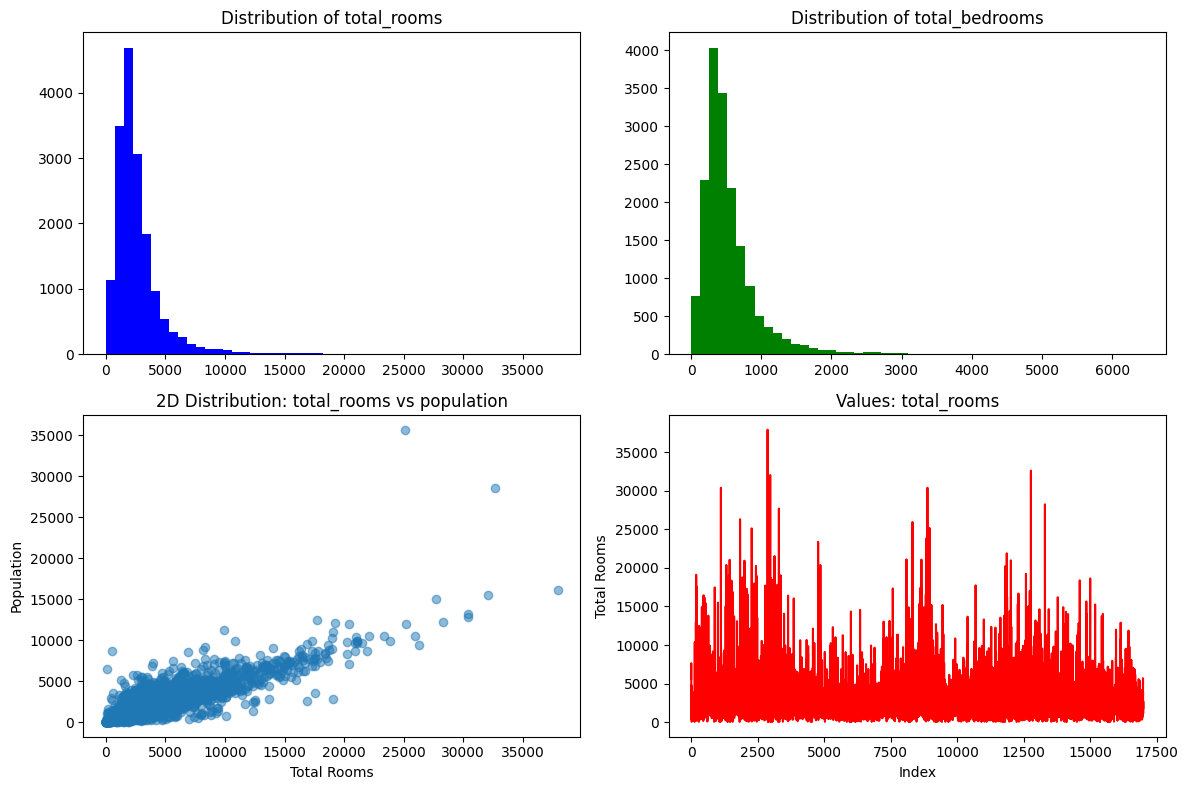

In [7]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("BigDataExample").getOrCreate()

df = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)
df.printSchema()
df.printSchema()
df.show(5)
row_count = df.count()
print(f"Number of rows: {row_count}")

df.select('total_rooms').distinct().show()

pandas_df = df.toPandas()
print(pandas_df.head())
pandas_df = df.toPandas()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(pandas_df['total_rooms'].dropna(), bins=50, color='blue')
plt.title('Distribution of total_rooms')

plt.subplot(2, 2, 2)
plt.hist(pandas_df['total_bedrooms'].dropna(), bins=50, color='green')
plt.title('Distribution of total_bedrooms')

plt.subplot(2, 2, 3)
plt.scatter(pandas_df['total_rooms'], pandas_df['population'], alpha=0.5)
plt.title('2D Distribution: total_rooms vs population')
plt.xlabel('Total Rooms')
plt.ylabel('Population')

plt.subplot(2, 2, 4)
plt.plot(pandas_df['total_rooms'], color='red')
plt.title('Values: total_rooms')
plt.xlabel('Index')
plt.ylabel('Total Rooms')

plt.tight_layout()
plt.show()
